In [21]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import IsolationForest
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [22]:
orginalData = pd.read_csv("Data.csv")
orginalData

,customer_id,customer_tenure,customer_location,customer_type,order_id,order_date,order_value,payment_method,order_frequency,discount_applied,return_status,product_category,product_sku,size,inventory_status,source,engagement_score
0,CUST00001,39,Delhi,Returning,ORD000001,00:04:52,4015.21,Net Banking,9,5,No,Jackets,SKU0001,XXL,In Stock,Word of Mouth,36
1,CUST00002,52,Hyderabad,Returning,ORD000002,00:39:38,2205.61,Credit Card,3,15,No,T-Shirts,SKU0002,S,Out of Stock,Google Ads,37
2,CUST00003,29,Pune,Returning,ORD000003,00:15:19,858.84,Net Banking,8,30,No,T-Shirts,SKU0003,L,In Stock,Email Marketing,95
3,CUST00004,15,Jaipur,Returning,ORD000004,00:52:58,500.00,UPI,1,0,No,T-Shirts,SKU0004,XXL,In Stock,Word of Mouth,10
4,CUST00005,43,Pune,Returning,ORD000005,00:17:40,1843.50,Wallet,9,40,Yes,Sweatshirts,SKU0005,L,In Stock,Word of Mouth,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,CUST00996,4,Mumbai,New,ORD000996,00:10:16,4043.83,Wallet,5,15,Yes,Shirts,SKU0996,XXL,In Stock,Google Ads,38
996,CUST00997,1,Chennai,New,ORD000997,00:43:04,3531.79,Credit Card,2,0,No,T-Shirts,SKU0997,S,In Stock,Facebook Ads,44
997,CUST00998,49,Delhi,Returning,ORD000998,00:38:23,3129.50,Net Banking,4,20,Yes,Jackets,SKU0998,XL,In Stock,Instagram,77
998,CUST00999,40,Mumbai,Returning,ORD000999,00:54:47,1934.51,Net Banking,2,20,No,Shirts,SKU0999,XXL,In Stock,Word of Mouth,80


In [23]:
data = orginalData.copy()
data

,customer_id,customer_tenure,customer_location,customer_type,order_id,order_date,order_value,payment_method,order_frequency,discount_applied,return_status,product_category,product_sku,size,inventory_status,source,engagement_score
0,CUST00001,39,Delhi,Returning,ORD000001,00:04:52,4015.21,Net Banking,9,5,No,Jackets,SKU0001,XXL,In Stock,Word of Mouth,36
1,CUST00002,52,Hyderabad,Returning,ORD000002,00:39:38,2205.61,Credit Card,3,15,No,T-Shirts,SKU0002,S,Out of Stock,Google Ads,37
2,CUST00003,29,Pune,Returning,ORD000003,00:15:19,858.84,Net Banking,8,30,No,T-Shirts,SKU0003,L,In Stock,Email Marketing,95
3,CUST00004,15,Jaipur,Returning,ORD000004,00:52:58,500.00,UPI,1,0,No,T-Shirts,SKU0004,XXL,In Stock,Word of Mouth,10
4,CUST00005,43,Pune,Returning,ORD000005,00:17:40,1843.50,Wallet,9,40,Yes,Sweatshirts,SKU0005,L,In Stock,Word of Mouth,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,CUST00996,4,Mumbai,New,ORD000996,00:10:16,4043.83,Wallet,5,15,Yes,Shirts,SKU0996,XXL,In Stock,Google Ads,38
996,CUST00997,1,Chennai,New,ORD000997,00:43:04,3531.79,Credit Card,2,0,No,T-Shirts,SKU0997,S,In Stock,Facebook Ads,44
997,CUST00998,49,Delhi,Returning,ORD000998,00:38:23,3129.50,Net Banking,4,20,Yes,Jackets,SKU0998,XL,In Stock,Instagram,77
998,CUST00999,40,Mumbai,Returning,ORD000999,00:54:47,1934.51,Net Banking,2,20,No,Shirts,SKU0999,XXL,In Stock,Word of Mouth,80


In [24]:
data = data.iloc[:, :11]
data

,customer_id,customer_tenure,customer_location,customer_type,order_id,order_date,order_value,payment_method,order_frequency,discount_applied,return_status
0,CUST00001,39,Delhi,Returning,ORD000001,00:04:52,4015.21,Net Banking,9,5,No
1,CUST00002,52,Hyderabad,Returning,ORD000002,00:39:38,2205.61,Credit Card,3,15,No
2,CUST00003,29,Pune,Returning,ORD000003,00:15:19,858.84,Net Banking,8,30,No
3,CUST00004,15,Jaipur,Returning,ORD000004,00:52:58,500.00,UPI,1,0,No
4,CUST00005,43,Pune,Returning,ORD000005,00:17:40,1843.50,Wallet,9,40,Yes
...,...,...,...,...,...,...,...,...,...,...,...
995,CUST00996,4,Mumbai,New,ORD000996,00:10:16,4043.83,Wallet,5,15,Yes
996,CUST00997,1,Chennai,New,ORD000997,00:43:04,3531.79,Credit Card,2,0,No
997,CUST00998,49,Delhi,Returning,ORD000998,00:38:23,3129.50,Net Banking,4,20,Yes
998,CUST00999,40,Mumbai,Returning,ORD000999,00:54:47,1934.51,Net Banking,2,20,No


In [25]:
data = data[['customer_tenure', 'customer_location', 'customer_type', 'order_value', 'payment_method',
       'order_frequency', 'discount_applied', 'return_status']]
data.sample(5)

,customer_tenure,customer_location,customer_type,order_value,payment_method,order_frequency,discount_applied,return_status
537,33,Mumbai,Returning,6549.57,Net Banking,5,25,No
502,57,Bangalore,Returning,500.00,COD,2,20,No
867,21,Kolkata,Returning,679.11,Net Banking,6,0,No
84,54,Pune,Returning,1913.59,UPI,4,0,No
431,19,Kolkata,Returning,3736.02,Net Banking,2,5,No


In [26]:
numericalFeatures = [col for col in data.columns if data[col].dtypes == 'O']
numericalFeatures

['customer_location', 'customer_type', 'payment_method', 'return_status']

In [27]:
ordinalEnoder = OrdinalEncoder()

for col in numericalFeatures:
    data[col] = ordinalEnoder.fit_transform(data[[col]])

In [28]:
features = data[['customer_tenure', 'customer_location', 'customer_type', 'order_value', 'payment_method',
       'order_frequency', 'discount_applied', 'return_status']]
features.sample(5)

,customer_tenure,customer_location,customer_type,order_value,payment_method,order_frequency,discount_applied,return_status
486,43,7.0,1.0,1848.83,2.0,8,0,0.0
243,15,7.0,1.0,4109.58,3.0,9,30,0.0
316,20,4.0,1.0,3684.85,1.0,4,25,0.0
806,29,7.0,1.0,1168.36,0.0,3,25,0.0
167,3,5.0,0.0,1031.85,0.0,5,0,0.0


In [29]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_tenure    1000 non-null   int64  
 1   customer_location  1000 non-null   float64
 2   customer_type      1000 non-null   float64
 3   order_value        1000 non-null   float64
 4   payment_method     1000 non-null   float64
 5   order_frequency    1000 non-null   int64  
 6   discount_applied   1000 non-null   int64  
 7   return_status      1000 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 62.6 KB


In [30]:
ordinalEnoder = OrdinalEncoder()

for col in numericalFeatures:
    features[col] = ordinalEnoder.fit_transform(features[[col]])

In [31]:
features.sample(5)

,customer_tenure,customer_location,customer_type,order_value,payment_method,order_frequency,discount_applied,return_status
751,14,2.0,1.0,1407.76,2.0,2,25,0.0
5,8,2.0,0.0,720.50,0.0,9,20,0.0
308,20,7.0,1.0,1998.24,4.0,1,15,0.0
982,37,0.0,1.0,1846.25,3.0,7,25,0.0
825,19,4.0,1.0,3935.29,3.0,6,0,0.0


In [32]:
model = IsolationForest(contamination=0.05) 

In [33]:
model.fit(features)

IsolationForest(contamination=0.05)

In [34]:
data['anomaly'] = model.predict(features)

In [35]:
anomalies = data[data['anomaly'] == -1]
anomalies

,customer_tenure,customer_location,customer_type,order_value,payment_method,order_frequency,discount_applied,return_status,anomaly
4,43,7.0,1.0,1843.50,4.0,9,40,1.0,-1
6,21,2.0,1.0,6396.56,2.0,2,30,1.0,-1
21,2,6.0,0.0,2125.40,4.0,1,50,0.0,-1
43,47,5.0,1.0,7251.06,3.0,6,0,1.0,-1
44,51,7.0,1.0,5853.51,4.0,5,25,1.0,-1
86,4,7.0,0.0,2430.37,3.0,1,20,1.0,-1
99,8,0.0,0.0,5366.21,2.0,1,20,0.0,-1
127,1,5.0,0.0,5081.25,0.0,5,15,1.0,-1
129,8,1.0,0.0,500.00,3.0,5,50,0.0,-1
145,7,2.0,0.0,5447.99,3.0,6,30,0.0,-1


In [36]:
non_anomalies = data[data['anomaly'] == 1]
non_anomalies

,customer_tenure,customer_location,customer_type,order_value,payment_method,order_frequency,discount_applied,return_status,anomaly
0,39,2.0,1.0,4015.21,2.0,9,5,0.0,1
1,52,3.0,1.0,2205.61,1.0,3,15,0.0,1
2,29,7.0,1.0,858.84,2.0,8,30,0.0,1
3,15,4.0,1.0,500.00,3.0,1,0,0.0,1
5,8,2.0,0.0,720.50,0.0,9,20,0.0,1
...,...,...,...,...,...,...,...,...,...
995,4,6.0,0.0,4043.83,4.0,5,15,1.0,1
996,1,1.0,0.0,3531.79,1.0,2,0,0.0,1
997,49,2.0,1.0,3129.50,2.0,4,20,1.0,1
998,40,6.0,1.0,1934.51,2.0,2,20,0.0,1


In [37]:
len(anomalies), len(non_anomalies)

(50, 950)

In [38]:
data['anomaly_score'] = model.decision_function(features)

In [39]:
correlation = data.corr()['anomaly_score'].sort_values(ascending=False)
print(correlation)

anomaly_score        1.000000
customer_type        0.531349
anomaly              0.511453
customer_tenure      0.274589
customer_location   -0.001114
payment_method      -0.051058
order_frequency     -0.067673
order_value         -0.112073
discount_applied    -0.353111
return_status       -0.529416
Name: anomaly_score, dtype: float64


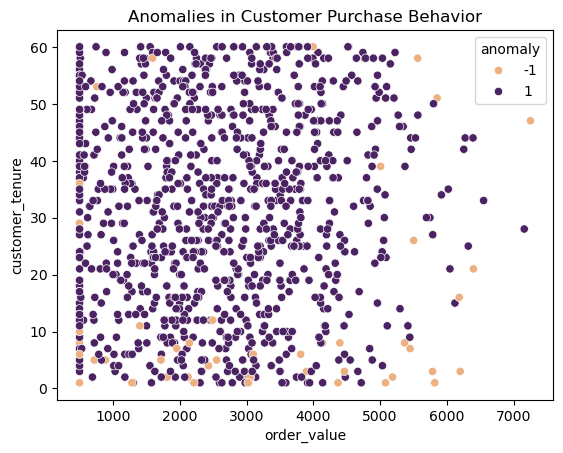

In [40]:
sns.scatterplot(data=data, x='order_value', y='customer_tenure', hue='anomaly', palette='flare')
plt.title('Anomalies in Customer Purchase Behavior')
plt.show()